In [3]:
import datetime
import numpy as np
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import os

def find_cryptodata(symbol): # Find crypto data from Yahoo Finance
    end_date = datetime.datetime.now()
    start_date = end_date - datetime.timedelta(days=60)

    data = yf.download(symbol, start=start_date.strftime('%Y-%m-%d'),end=end_date.strftime('%Y-%m-%d'), interval="1h")

    return data[['Close']]

def preprocess_data(lb,data): # Fits data for individual crypto model's scale
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)

    X,y = [], []

    for i in range(lb, len(scaled_data)-1):
        X.append(scaled_data[i-lb:i])
        y.append(scaled_data[i + 1])

    return np.array(X), np.array(y), scaler

def build_model(lb): # A fits-all model
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=(lb, 1)),
        Dropout(0.2),
        LSTM(64, return_sequences=False),
        Dropout(0.2),
        Dense(32, activation="relu"),
        Dense(1)
    ])

    model.compile(optimizer="adam", loss="mean_squared_error")
    return model

def train_model(lb,ep,bs,symbol): # Training the individual model
    print(f"Training model: {symbol} \n")
    data = find_cryptodata(symbol)

    X, y, scaler = preprocess_data(lb,data)
    model = build_model(lb)
    history = model.fit(X, y, epochs=ep, batch_size=bs, verbose=1)

    model.save(f"{symbol}.keras")
    print(f"Model saved: {symbol} \n")

    return model, scaler, X, y

def eval_model(model, scaler, X, y): #Evaluating the model for an error percentage based on current data
    predictions = model.predict(X)
    predictions = scaler.inverse_transform(predictions)
    actuals = scaler.inverse_transform(y)

    error = np.mean(np.abs(predictions - actuals) / actuals) * 100
    print(f"Error: {error:.2f}%")
    return error

In [4]:
os.makedirs("models", exist_ok=True)

CRYPTOS = ["BTC-USD", "ETH-USD", "XRP-USD", "SOL-USD", "DOGE-USD"] # Current currencies added for popularity, you can add more if you want

# Parameters

LOOK_BACK = 48 # Lookback at 48 hours worth of crypto readings
EPOCHS = 40 # Number of epochs
BATCH_SIZE = 32 # Batch size

for symbol in CRYPTOS:
    best_model = None
    best_scaler = None
    best_error = float('inf') #Starting error at infinity

    while best_error > 2.0: #Ensuring best model is less than 2 percent error
        model, scaler, X, y = train_model(LOOK_BACK, EPOCHS, BATCH_SIZE, symbol)
        error = eval_model(model, scaler, X, y)

        if error < best_error:
            best_model = model
            best_scaler = scaler
            best_error = error

    best_model.save(f"models/{symbol}.keras")

    temp_model_path = f"{symbol}.keras"
    if os.path.exists(temp_model_path):
        os.remove(temp_model_path)

    print(f"Model saved: {symbol} with error: {best_error:.2f}\n")


Training model: BTC-USD 

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.1179
Epoch 2/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 0.0051
Epoch 3/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0034
Epoch 4/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0034
Epoch 5/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0033
Epoch 6/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0030
Epoch 7/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 0.0029
Epoch 8/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0026
Epoch 9/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0027
Epoch 10/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0022
Epoch 11/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0024
Epoch 12/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 0.0025
Epoch 13/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.0021
Epoch 14/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0025
Epoch 15/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0021
Epoc

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.1110
Epoch 2/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0045
Epoch 3/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 0.0036
Epoch 4/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 0.0039
Epoch 5/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0031
Epoch 6/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0030
Epoch 7/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0027
Epoch 8/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 0.0027
Epoch 9/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0026
Epoch 10/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0024
Epoch 11/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0022
Epoch 12/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0020
Epoch 13/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 0.0024
Epoch 14/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0021
Epoch 15/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0019
Epoc

[*********************100%***********************]  1 of 1 completed

Error: 2.33%
Training model: ETH-USD 

Epoch 1/40



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 0.0743
Epoch 2/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0042
Epoch 3/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 0.0041
Epoch 4/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0038
Epoch 5/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0030
Epoch 6/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0029
Epoch 7/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0024
Epoch 8/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.0026
Epoch 9/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 0.0023
Epoch 10/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0023
Epoch 11/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0019
Epoch 12/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 0.0021
Epoch 13/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0021
Epoch 14/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0021
Epoch 15/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0022
Epoch 16/40
44/

[*********************100%***********************]  1 of 1 completed

Epoch 1/40



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.0558
Epoch 2/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0058
Epoch 3/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0042
Epoch 4/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0039
Epoch 5/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 0.0036
Epoch 6/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0041
Epoch 7/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0032
Epoch 8/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0032
Epoch 9/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0034
Epoch 10/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 0.0032
Epoch 11/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0031
Epoch 12/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0029
Epoch 13/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0029
Epoch 14/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 0.0031
Epoch 15/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0025
Epoch 16/40
44/

[*********************100%***********************]  1 of 1 completed

Epoch 1/40



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.0890
Epoch 2/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 0.0061
Epoch 3/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0043
Epoch 4/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0038
Epoch 5/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0037
Epoch 6/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0038
Epoch 7/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 0.0033
Epoch 8/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0032
Epoch 9/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0028
Epoch 10/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0028
Epoch 11/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0025
Epoch 12/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 0.0027
Epoch 13/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0029
Epoch 14/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0024
Epoch 15/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0023
Epoch 16/40
44/

[*********************100%***********************]  1 of 1 completed

Epoch 1/40



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.0862
Epoch 2/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 0.0056
Epoch 3/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0041
Epoch 4/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0046
Epoch 5/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0032
Epoch 6/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0033
Epoch 7/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 0.0029
Epoch 8/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 0.0032
Epoch 9/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0032
Epoch 10/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0030
Epoch 11/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 0.0035
Epoch 12/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 0.0026
Epoch 13/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0023
Epoch 14/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0025
Epoch 15/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.0024
Epoch 16/40
44/

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


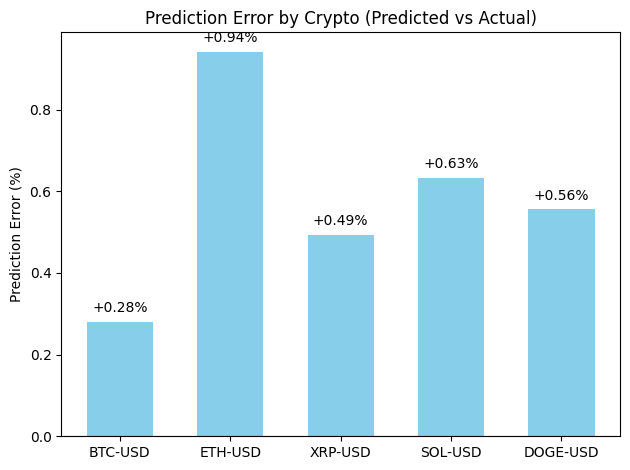

In [8]:
from keras.models import load_model
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

# Parameters

CRYPTOS = ["BTC-USD", "ETH-USD", "XRP-USD", "SOL-USD", "DOGE-USD"]
errors = {}
models = {coin: load_model(f"models/{coin}.keras") for coin in CRYPTOS}

for crypto in CRYPTOS:
    lb = 48
    data = yf.download(crypto, period="3d", interval="1h")['Close'].dropna() # Downloading necessary crypto figures from last 3 days on hourly basis

    if len(data) < lb:
        print(f"Not enough data for {crypto}")
        continue

# Ensuring fitting and scaling for model

    scaler = MinMaxScaler(feature_range=(0, 1))
    prices = np.array(data).reshape(-1, 1)
    scaler.fit(prices)

    recent_data = prices[-lb:]
    scaled_input = scaler.transform(recent_data).reshape(1, lb, 1)

    pred_scaled = models[crypto].predict(scaled_input, verbose=0) #Model is asked to predict next value
    pred = float(scaler.inverse_transform(pred_scaled)[0, 0])
    actual = data.iloc[-1].item()

    error_percent = ((pred - actual) / actual) * 100
    errors[crypto] = error_percent

# Plotting
cryptos = list(errors.keys())
percent_errors = [errors[c] for c in cryptos]

x = np.arange(len(cryptos))
width = 0.6

fig, ax = plt.subplots()
bars = ax.bar(x, percent_errors, width, color='skyblue')

ax.set_ylabel('Prediction Error (%)')
ax.set_title('Prediction Error by Crypto (Predicted vs Actual)')
ax.set_xticks(x)
ax.set_xticklabels(cryptos)
ax.axhline(0, color='gray', linewidth=0.8)

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:+.2f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()
